<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_01_adult_income_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importing necessary libraries
import pandas as pd  # for tabular dataframe
import numpy as np  # for numerical computation
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline

In [43]:
# Loading The Dataset
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/adult.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/adult.csv'  # Local path

Mounted at /content/drive


In [44]:
data = pd.read_csv(file_path)

# Display the first row of the dataset
data.head(1)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [45]:
# Add the feature names to a list
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'class-label']

# Load the dataset again with column names
data = pd.read_csv(file_path, names=names)

In [46]:
# Display the first two rows
data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [47]:
# Display the first 10 rows
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [48]:
# Display the last two rows
data.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class-label
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [49]:
# Print the shape of the dataset
print(f'data shape: {data.shape}')

data shape: (32561, 15)


In [50]:
# Generating a unique dataset for this task (replace 448 with last three digits of student number)
data = data.sample(n=30000, random_state=236)

In [51]:
# Check the new shape of the dataset
data.shape

(30000, 15)

In [52]:
# Generate summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,38.570900,13.647038,17.0,28.0,37.0,48.00,90.0
fnlwgt,30000.0,189787.527867,105747.725172,14878.0,117789.0,178302.0,236833.25,1484705.0
education-num,30000.0,10.078600,2.570196,1.0,9.0,10.0,12.00,16.0
capital-gain,30000.0,1057.518267,7243.947257,0.0,0.0,0.0,0.00,99999.0
capital-loss,30000.0,87.343100,403.019196,0.0,0.0,0.0,0.00,4356.0
hours-per-week,30000.0,40.460600,12.362505,1.0,40.0,40.0,45.00,99.0


In [53]:
# Count the occurrences of education-num values
data['education-num'].value_counts()

,count
education-num,
9,9647
10,6744
13,4930
14,1581
11,1276
7,1077
12,993
6,864
4,606


In [54]:
# Count the occurrences of education values
data['education'].value_counts()

,count
education,
HS-grad,9647
Some-college,6744
Bachelors,4930
Masters,1581
Assoc-voc,1276
11th,1077
Assoc-acdm,993
10th,864
7th-8th,606


In [55]:
# Drop the fnlwgt column
data = data.drop('fnlwgt', axis=1)

In [56]:
# Verify the shape after dropping a column
data.shape


(30000, 14)

In [57]:

# Generate descriptive statistics including all columns
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30000.0,NaN,NaN,NaN,38.5709,13.647038,17.0,28.0,37.0,48.0,90.0
workclass,30000,9,Private,20913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,30000,16,HS-grad,9647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,30000.0,NaN,NaN,NaN,10.0786,2.570196,1.0,9.0,10.0,12.0,16.0
marital-status,30000,7,Married-civ-spouse,13765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30000,15,Prof-specialty,3795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30000,6,Husband,12107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30000,5,White,25634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30000,2,Male,20043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,30000.0,NaN,NaN,NaN,1057.518267,7243.947257,0.0,0.0,0.0,0.0,99999.0


In [58]:
# Count the occurrences of education values
data['education'].value_counts()

,count
education,
HS-grad,9647
Some-college,6744
Bachelors,4930
Masters,1581
Assoc-voc,1276
11th,1077
Assoc-acdm,993
10th,864
7th-8th,606


In [59]:
# Count the occurrences of age values
data['age'].value_counts()

,count
age,
36,838
31,815
35,815
33,810
34,809
...,...
83,5
88,3
85,3


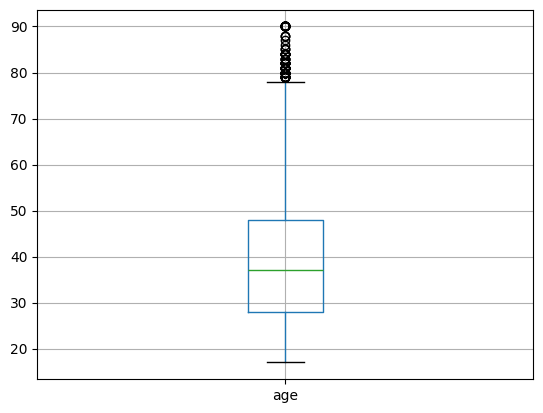

In [60]:
# Boxplot for age
data.boxplot(column='age')
plt.show()

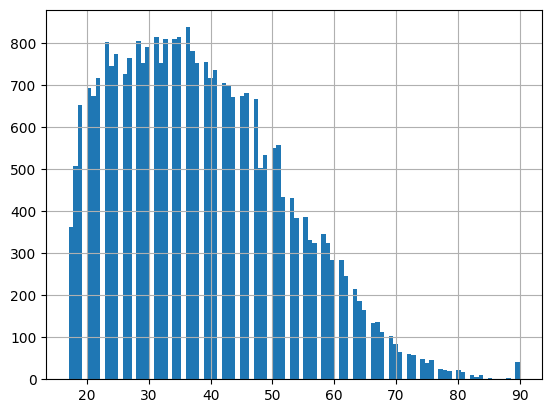


There are 20043 males and 9957 females in the dataset.


<ipython-input-61-125215733a45>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_males = data.sex.value_counts()[0]
<ipython-input-61-125215733a45>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_females = data.sex.value_counts()[1]


,age
sex,
Female,36.803254
Male,39.449035


,marital-status,capital-gain Male,capital-gain Female


,min,max
sex,,
Female,17,90
Male,17,90


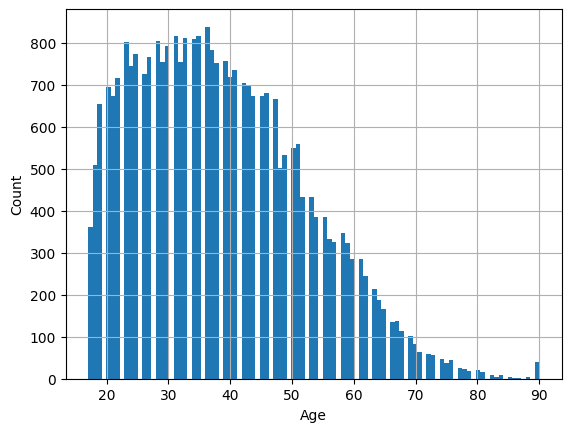

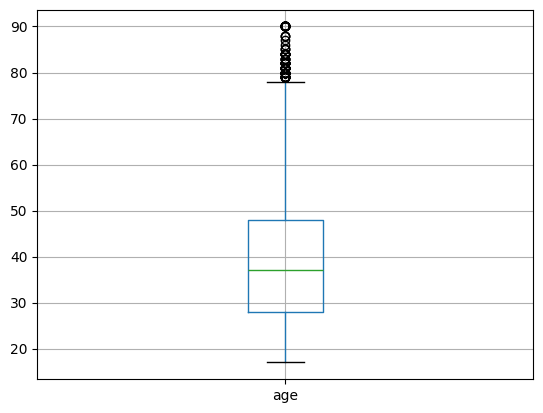

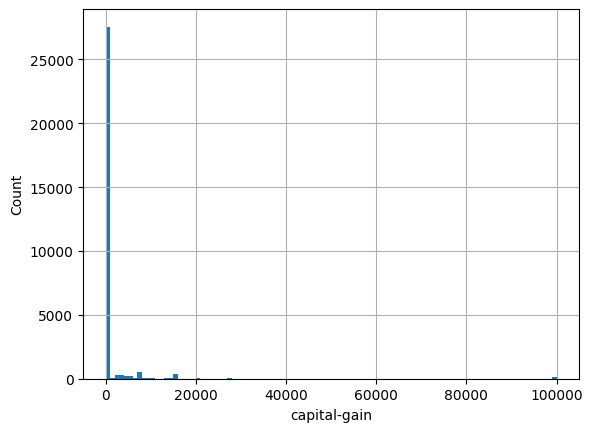

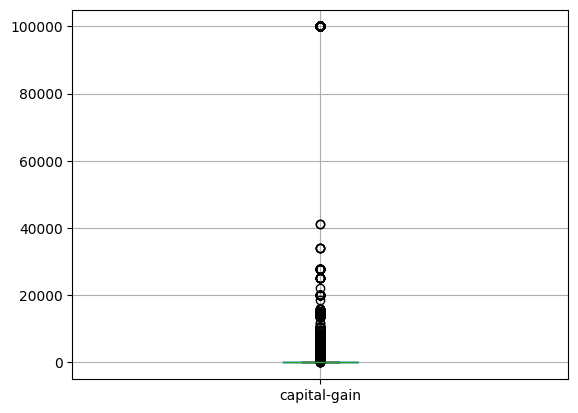

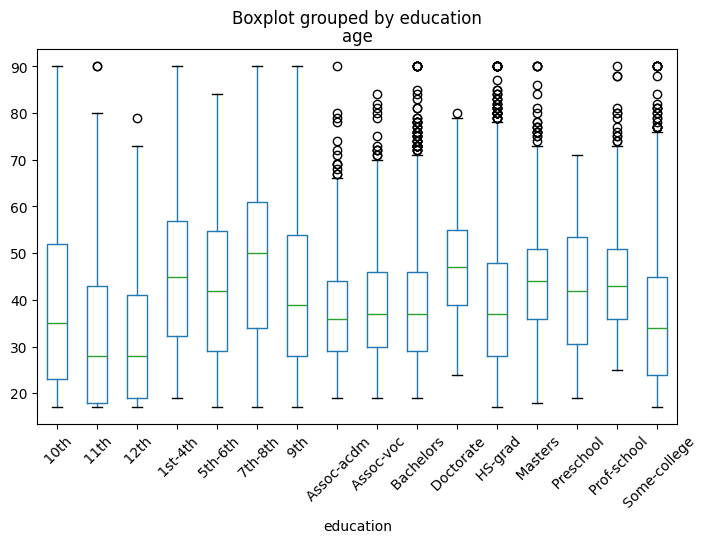

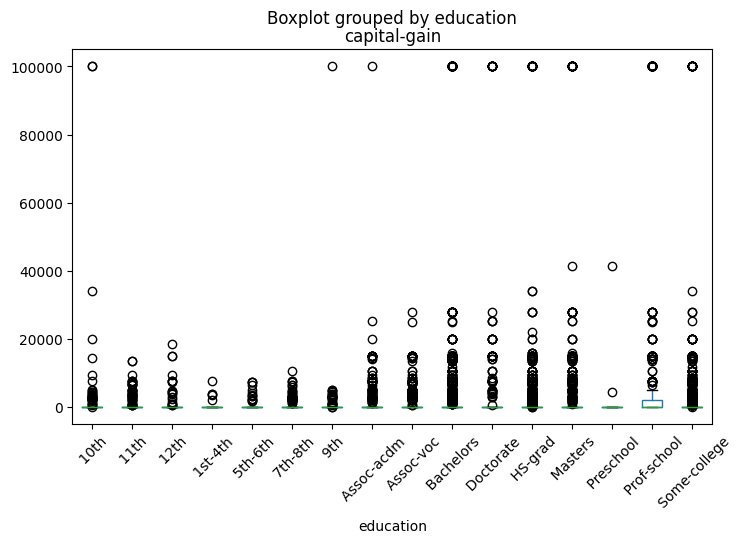

,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


In [61]:

# Histogram of age distribution
data['age'].hist(bins=100)
plt.show()


In [ ]:

# Compare mean and median age
data.age.mean() > data.age.median()


In [ ]:

# Count occurrences of each sex category
data['sex'].value_counts()


In [ ]:

# Display column names
data.columns


In [ ]:

# Display column names again
data.keys()


In [ ]:

# Count occurrences of workclass values
data['workclass'].value_counts()


In [ ]:

# Count the number of males and females in the dataset
num_males = data.sex.value_counts()[0]
num_females = data.sex.value_counts()[1]
print(f'\nThere are {num_males} males and {num_females} females in the dataset.')


In [ ]:

# Apply groupby function to calculate the mean age of each sex
mean_age_sex = data.age.groupby(data.sex).mean()
display(mean_age_sex.to_frame())


In [ ]:

# Calculate the mean age for each sex and education category
data.age.groupby([data.sex, data.education]).mean()


In [ ]:

# Calculate average capital-gain for each sex and occupation category
average_capital_gain = data.groupby(['sex', 'occupation'])['capital-gain'].mean().unstack()
average_capital_gain.round(2)


In [ ]:

# Extract specific columns
extracted_data = data[['occupation', 'sex', 'capital-gain']]
mean_capital_gain = extracted_data.groupby(['occupation', 'sex'])['capital-gain'].mean().unstack()
mean_capital_gain.columns = ['mean_capital-gain_Female', 'mean_capital-gain_Male']
mean_capital_gain.reset_index(inplace=True)
mean_capital_gain['Total'] = mean_capital_gain['mean_capital-gain_Female'] + mean_capital_gain['mean_capital-gain_Male']
mean_capital_gain.round(2)


In [ ]:

# Filter the DataFrame for Male and Female records
male_data = data[data['sex'] == 'Male']
female_data = data[data['sex'] == 'Female']

# Group by marital-status and calculate the sum of capital-gain for Male and Female
male_grouped = male_data.groupby('marital-status')['capital-gain'].sum().reset_index()
female_grouped = female_data.groupby('marital-status')['capital-gain'].sum().reset_index()

# Rename the capital-gain columns
male_grouped.rename(columns={'capital-gain': 'capital-gain Male'}, inplace=True)
female_grouped.rename(columns={'capital-gain': 'capital-gain Female'}, inplace=True)

# Merge the Male and Female DataFrames
merged_data = pd.merge(male_grouped, female_grouped, on='marital-status')
display(merged_data)


In [ ]:

# Find maximum age across different races
data.age.groupby(data.race).max()


In [ ]:

# Check if minimum and maximum age by sex are the same
age_range = data.groupby('sex')['age'].agg(['min', 'max'])
display(age_range)
is_min_same = age_range['min'].nunique() == 1
is_max_same = age_range['max'].nunique() == 1


In [ ]:

# Histogram of age distribution
data.age.hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:

# Boxplot for age
data.boxplot(column='age')
plt.show()


In [ ]:

# Histogram for capital-gain
data['capital-gain'].hist(bins=100)
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.show()


In [ ]:

# Boxplot for capital-gain
data.boxplot(column='capital-gain')
plt.show()


In [ ]:

# Boxplot of age by education
data.boxplot(column='age', by='education', grid=False, rot=45, fontsize=10, figsize=(8, 5))
plt.show()


In [ ]:

# Boxplot of capital-gain by education
data.boxplot(column='capital-gain', by='education', grid=False, rot=45, fontsize=10, figsize=(8, 5))
plt.show()


In [ ]:

# Check for null values
data.apply(lambda x: sum(x.isnull()), axis=0)


In [62]:

# Apply Label Encoding to categorical variables
from sklearn.preprocessing import LabelEncoder
columns = list(data.select_dtypes(exclude=['int64']))
le = LabelEncoder()
for i in columns:
    data[i] = le.fit_transform(data[i])


In [63]:

# Reload dataset and clean whitespace in categorical columns
data = pd.read_csv(file_path, names=names)
data = data.sample(n=30000, random_state=236)
data.occupation = data.occupation.str.strip()
data.sex = data.sex.str.strip()


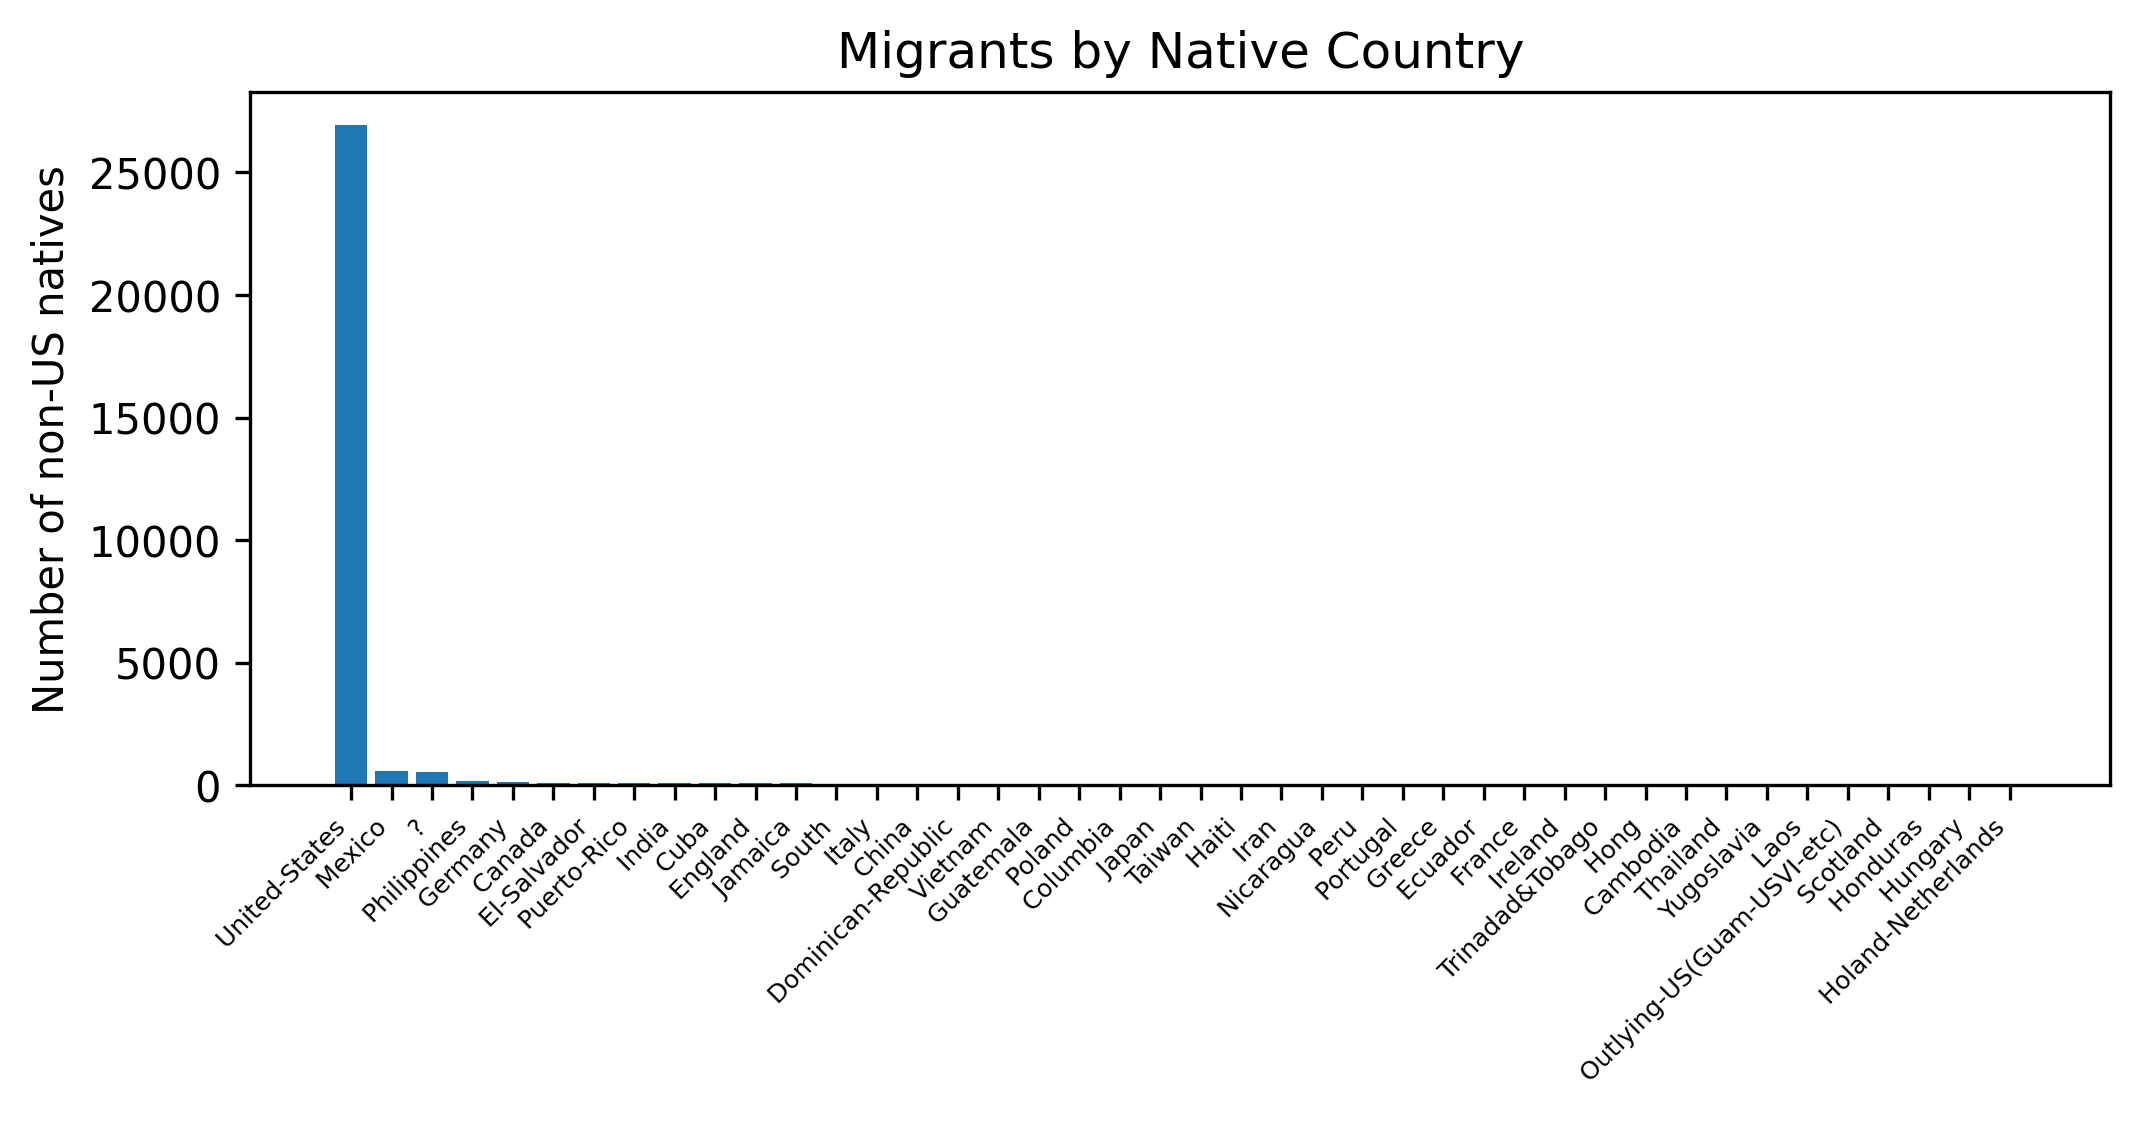

In [64]:

# Count migrants (excluding US natives)
df = data[data['native-country'] != 'United-States']
country_counts = df['native-country'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 3), dpi=300)
bars = ax.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.ylabel('Number of non-US natives')
plt.title('Migrants by Native Country')
plt.show()


In [65]:

# Identify occupation with more males than females
occupation_counts = data.groupby(['occupation', 'sex']).size().unstack()
occupation_counts['Total'] = occupation_counts.sum(axis=1)
occupation_counts['Percent Male'] = (occupation_counts['Male'] / occupation_counts['Total']) * 100
occupation_counts = occupation_counts.sort_values('Percent Male', ascending=False)
occupation_counts.reset_index(inplace=True)
display(occupation_counts)


sex,occupation,Female,Male,Total,Percent Male
0,Armed-Forces,NaN,9.0,9.0,100.000000
1,Craft-repair,208.0,3543.0,3751.0,94.454812
2,Transport-moving,84.0,1389.0,1473.0,94.297352
3,Farming-fishing,61.0,863.0,924.0,93.398268
4,Handlers-cleaners,148.0,1106.0,1254.0,88.197767
5,Protective-serv,70.0,523.0,593.0,88.195616
6,Machine-op-inspct,491.0,1333.0,1824.0,73.081140
7,Exec-managerial,1077.0,2680.0,3757.0,71.333511
8,Sales,1179.0,2205.0,3384.0,65.159574
9,Prof-specialty,1390.0,2405.0,3795.0,63.372859
